# COVID-19 & Health Predictor 

#### - Data Bootcamp Final Project
##### - Cordell, Gibbs, Miller, Ross

# Purpose: 
### Analyze COVID-19 Positivity or Negativity Based on Correlation to Nutrition

# Model: Linear Regression Model

In [101]:
from sklearn.linear_model import LinearRegression

## Library & Dependency Installation

In [102]:
# Scikit-Learn Libraries/Dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [103]:
# Data Frame & Data Manipulation Libraries/Dependencies
import pandas as pd

## Loading the Data

#### Physical Path Import

In [104]:
# Create File Path
file_path = "https://raw.githubusercontent.com/sterlingvm/Data_Bootcamp_Project/projectrepo/final_joined_data.csv"

# Build the Dataframe
dataframe = pd.read_csv(file_path)

In [105]:
# Preview the Data
dataframe.head(15)

,COUNTRY,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,...,Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Sugar & Sweeteners,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished
0,Albania,Europe,275416,9570.366,225,7.818,44,3497,121.516,1,...,6.7861,1.8845,15.7213,1.5367,0.1515,0.3261,11.7753,31.2304,22.3,6.2
1,Algeria,Africa,265800,606.143,18,0.041,0,6875,15.678,0,...,6.3801,1.1305,7.6189,1.8342,0.1152,1.0310,11.6484,40.3651,26.6,3.9
2,Angola,Africa,99287,302.094,0,0.000,0,1900,5.781,0,...,6.0005,2.0571,0.8311,1.8495,0.0061,0.6463,2.3041,45.0722,6.8,25
3,Argentina,Americas,9101319,20137.544,17646,39.043,0,128729,284.825,76,...,6.0435,7.0421,10.2328,3.0536,0.0200,0.9541,4.3503,30.6559,28.5,4.6
4,Armenia,Europe,422900,14271.570,23,0.776,0,8623,291.000,1,...,6.0989,2.2675,9.9407,2.6579,0.1108,0.4705,16.7019,36.4358,20.9,4.3
5,Australia,Western Pacific,6328508,24817.791,305766,1199.088,48015,7565,29.667,254,...,4.1883,6.7049,12.1018,2.5364,0.3176,1.2798,5.1406,28.5806,30.4,<2.5
6,Austria,Europe,4231050,47534.205,36813,413.580,4787,19816,222.625,51,...,4.6069,4.6810,12.3776,2.6094,0.2367,0.8109,5.1098,30.4338,21.9,<2.5
7,Azerbaijan,Europe,792638,7817.579,53,0.523,6,9709,95.757,0,...,4.7988,2.1513,8.3212,1.5523,0.1906,0.2235,10.0755,38.3584,19.9,<2.5
8,Bangladesh,South-East Asia,1952855,1185.781,112,0.068,0,29127,17.686,0,...,2.8655,0.4191,1.8778,0.9285,0.0934,0.7615,3.6405,44.8033,3.4,14.7
9,Barbados,Americas,73856,25700.217,3363,1170.248,264,430,149.630,32,...,5.8723,5.8477,2.2041,4.3344,0.0852,0.8677,5.4725,37.5167,24.8,3.9


## Connect to Database

In [106]:
# # Install Postgres Driver
# !wget https://jdbc.postgresql.org/download/postgresql-42.2.16.jar

##### Build Database Connection

In [107]:
# # Import Module to Communicate with PostgreSQL
# import psycopg2 as pg

# # Import Password Protector
# from getpass import getpass

# # Build Engine for Connection
# engine = pg.connect(
#     "
#     dbname='my_db_name' 
#     user='pguser' 
#     host='127.0.0.1' 
#     port='15432' 
#     password=getpass('pgpassword')
#     "
# )

# dataframe = pd.read_sql('select * from Stat_Table', con=engine)

In [108]:
# # Import Module to Communicate with PostgreSQL
# import psycopg2

# # Connection parameters - yours will be different
# param_dic = {
#     "host"      : "localhost",
#     "database"  : "globaldata",
#     "user"      : "myuser",
#     "password"  : "Passw0rd"
# }

# # Define the connection function
# def connect(params_dic):
#     """ Connect to the PostgreSQL database server """
#     conn = None
#     try:
#         # connect to the PostgreSQL server
#         print('Connecting to the PostgreSQL database...')
#         conn = psycopg2.connect(**params_dic)
#     except (Exception, psycopg2.DatabaseError) as error:
#         print(error)
#         sys.exit(1) 
#     print("Connection successful")
#     return conn


In [109]:
# # Connect to Database
# connect(param_dic)

##### Retrieve Table/DataFrame from Database

In [110]:
# # Define our Data Table Retreival Function
# def postgresql_to_dataframe(conn, select_query, column_names):
#     """
#     Tranform a SELECT query into a pandas dataframe
#     """
#     cursor = conn.cursor()
#     try:
#         cursor.execute(select_query)
#     except (Exception, psycopg2.DatabaseError) as error:
#         print("Error: %s" % error)
#         cursor.close()
#         return 1
    
#     # Naturally we get a list of tupples
#     tupples = cursor.fetchall()
#     cursor.close()
    
#     # We just need to turn it into a pandas dataframe
#     df = pd.DataFrame(tupples, columns=column_names)
#               # *** Potentially change this ^ so that we don't have to input column names by hand ***
#     return df

In [111]:
# # Retreive Data
# postgresql_to_dataframe(conn, select_query, column_names)

# # Rename DataFrame Variable
# dataframe = df

## Process & Preprocess the Data

### Clean the Data

##### Identify Categorical Variables/Columns

In [112]:
# Generate our categorical variable list
categorical_columns = dataframe.dtypes[dataframe.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
dataframe[categorical_columns].nunique()

COUNTRY               131
WHO Region              6
ISO3                  131
WHO_REGION              6
DATA_SOURCE             1
DATE_UPDATED           16
VACCINES_USED          80
FIRST_VACCINE_DATE     67
Undernourished         78
dtype: int64

In [113]:
dataframe.columns

Index(['COUNTRY', 'WHO Region', 'Cases - cumulative total',
       'Cases - cumulative total per 100000 population',
       'Cases - newly reported in last 7 days',
       'Cases - newly reported in last 7 days per 100000 population',
       'Cases - newly reported in last 24 hours', 'Deaths - cumulative total',
       'Deaths - cumulative total per 100000 population',
       'Deaths - newly reported in last 7 days',
       'Deaths - newly reported in last 7 days per 100000 population',
       'Deaths - newly reported in last 24 hours', 'Case_Fatality_Ratio',
       'ISO3', 'WHO_REGION', 'DATA_SOURCE', 'DATE_UPDATED',
       'TOTAL_VACCINATIONS', 'PERSONS_VACCINATED_1PLUS_DOSE',
       'TOTAL_VACCINATIONS_PER100', 'PERSONS_VACCINATED_1PLUS_DOSE_PER100',
       'PERSONS_FULLY_VACCINATED', 'PERSONS_FULLY_VACCINATED_PER100',
       'VACCINES_USED', 'FIRST_VACCINE_DATE', 'NUMBER_VACCINES_TYPES_USED',
       'PERSONS_BOOSTER_ADD_DOSE', 'PERSONS_BOOSTER_ADD_DOSE_PER100',
       'Alcoholic Be

In [114]:
droppable = ["WHO Region", "COUNTRY", "ISO3", "WHO_REGION", "DATA_SOURCE", "DATE_UPDATED", "VACCINES_USED", "FIRST_VACCINE_DATE", "Undernourished"]

##### Determing Bucketing - if categorical column has more than 10 unique values, consider binning!


In [115]:
## OPTIONAL ##

## Analyze frequencies of unique values in categorical column(s)
# column1_counts = dataframe.insert_column_name_here.value_counts()

## Plot the value counts - then determine the cut off(s) for binning
# column1_counts.plot.density()

In [116]:
## OPTIONAL ##

## Determine which values to replace
# replace_column1 = list(column1_counts[column1_counts < cutoff_value].index)

## Replace the column values you'd like to bucket together in the DataFrame
# for value in replace_column1:
  # dataframe.insert_column_name_here = dataframe.insert_column_name_here.replace(value,"New_Bucketed_Value_Name-Ex:'Other'")

## Check to make sure the bucketing/binning was successful
# dataframe.insert_column_name_here.value_counts()

##### Encode the Categorical Values

In [117]:
# Import the LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [118]:
# # Instantiate LabelEncoder
# encoder = LabelEncoder()

# # Create a copy of the dataframe and encode the data
# dataframe_copy = dataframe.copy()

# # Train the LabelEncoder, convert the text columns to string columns
# for x in categorical_columns:
#   dataframe_copy[f"{x}"] = encoder.fit_transform(dataframe_copy[f"{x}"])

# # Preview the converted tables
# dataframe_copy.head(15)

### Dataset Training & Test Splitting

##### Separate Features from Outcomes

##### Features(X)

In [119]:
# Create Features Dataset
# X = dataframe_copy.copy()

X = dataframe.copy()
X = X.drop(["WHO Region", "COUNTRY", "ISO3", "WHO_REGION", "DATA_SOURCE", "DATE_UPDATED", "VACCINES_USED", "FIRST_VACCINE_DATE", "Undernourished"], axis=1)

# Preview the Dataset
X.head(15)

,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours,...,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Sugar & Sweeteners,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity
0,275416,9570.366,225,7.818,44,3497,121.516,1,0.035,0,...,0.2126,6.7861,1.8845,15.7213,1.5367,0.1515,0.3261,11.7753,31.2304,22.3
1,265800,606.143,18,0.041,0,6875,15.678,0,0.000,0,...,0.2416,6.3801,1.1305,7.6189,1.8342,0.1152,1.0310,11.6484,40.3651,26.6
2,99287,302.094,0,0.000,0,1900,5.781,0,0.000,0,...,1.7707,6.0005,2.0571,0.8311,1.8495,0.0061,0.6463,2.3041,45.0722,6.8
3,9101319,20137.544,17646,39.043,0,128729,284.825,76,0.168,0,...,0.4693,6.0435,7.0421,10.2328,3.0536,0.0200,0.9541,4.3503,30.6559,28.5
4,422900,14271.570,23,0.776,0,8623,291.000,1,0.034,0,...,0.2896,6.0989,2.2675,9.9407,2.6579,0.1108,0.4705,16.7019,36.4358,20.9
5,6328508,24817.791,305766,1199.088,48015,7565,29.667,254,0.996,49,...,1.4264,4.1883,6.7049,12.1018,2.5364,0.3176,1.2798,5.1406,28.5806,30.4
6,4231050,47534.205,36813,413.580,4787,19816,222.625,51,0.573,3,...,0.7562,4.6069,4.6810,12.3776,2.6094,0.2367,0.8109,5.1098,30.4338,21.9
7,792638,7817.579,53,0.523,6,9709,95.757,0,0.000,0,...,0.2020,4.7988,2.1513,8.3212,1.5523,0.1906,0.2235,10.0755,38.3584,19.9
8,1952855,1185.781,112,0.068,0,29127,17.686,0,0.000,0,...,2.5221,2.8655,0.4191,1.8778,0.9285,0.0934,0.7615,3.6405,44.8033,3.4
9,73856,25700.217,3363,1170.248,264,430,149.630,32,11.135,24,...,3.2750,5.8723,5.8477,2.2041,4.3344,0.0852,0.8677,5.4725,37.5167,24.8


##### Outcomes (y)

In [120]:
# Create Outcomes Dataset
y = dataframe["Case_Fatality_Ratio"]

# Preview the data
y.head(15)

0     1.269711
1     2.586518
2     1.913643
3     1.414398
4     2.039019
5     0.119539
6     0.468347
7     1.224893
8     1.491506
9     0.582213
10    0.709968
11    0.769853
12    1.172084
13    0.878512
14    2.172394
Name: Case_Fatality_Ratio, dtype: float64

#### Create Training & Testing Splits

In [121]:
# Split Data into Training & Testing (Default: 75%/25% Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=615, train_size=None)

# | Change the split % by editting the "train_size parameter to your training split percentage" |
      # Example: train_size = 0.80 results in an 80%/20% split

In [122]:
# Preview the shapes of the Split Datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(98, 34)
(33, 34)
(98,)
(33,)


#### Standardizing/Scaling the Data

In [123]:
# Instantiate the Scaler
scaler = StandardScaler()

In [124]:
# Fit/Train Scaler to the Training Data
X_scaler = scaler.fit(X_train)

In [125]:
# Scale / Transform the X data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Apply the Model

#### Instantiate, Fit, & Evaluate the Model

In [126]:
# Instantiate the Model
lr_model = LinearRegression()

In [127]:
# Fit the Model to the Training Data
lr_model.fit(X_train_scaled,y_train)

LinearRegression()

In [128]:
# Create predictions with the model using X_test Data.
y_pred = lr_model.predict(X_test)

# View the Data
print(y_pred.shape)

(33,)


#### Evaluate the Model

In [132]:
# Import the Evaluation Metrics & Dependencies
import matplotlib.pyplot as plt

##### Display Evaluation

In [139]:
print(f'model score on training data: {lr_model.score(X_train, y_train)}')
print(f'model score on testing data: {lr_model.score(X_test, y_test)}')

model score on training data: -1.3223803566346786
model score on testing data: -1.136954568002523


In [135]:
# Use R2 Score to determine the model's validity
score = lr_model.score(X, y)
print(f"R2 Score: {score}")

R2 Score: -1.260207342290474


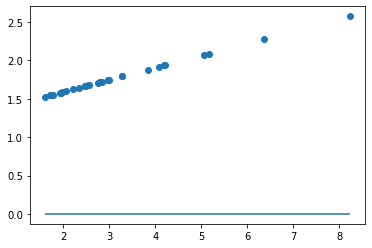

In [137]:
# Plot the results. The best fit line is red.
# Plot Residuals
plt.scatter(y_pred, y_pred - y_test)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max())
plt.show()


## Results & Takeaways

#### Model Effectiveness & Applications Summary

*Insert Model Summary & Results Write-Up Here*

#### Feature Importances & *Weights*

In [144]:
import numpy as np

In [149]:
def get_score_after_permutation(model, X, y, curr_feat):
    """ return the score of model when curr_feat is permuted """

    X_permuted = X.copy()
    col_idx = list(X.columns).index(curr_feat)
    # permute one column
    X_permuted.iloc[:, col_idx] = np.random.permutation(
        X_permuted[curr_feat].values)

    permuted_score = model.score(X_permuted, y)
    return permuted_score

In [150]:
def get_feature_importance(model, X, y, curr_feat):
    """ compare the score when curr_feat is permuted """

    baseline_score_train = model.score(X, y)
    permuted_score_train = get_score_after_permutation(model, X, y, curr_feat)

    # feature importance is the difference between the two scores
    feature_importance = baseline_score_train - permuted_score_train
    return feature_importance

In [151]:
# Create a sorted list of features from most important to overall outcome to least important!
def permutation_importance(model, X, y, n_repeats=10):
    """Calculate importance score for each feature."""

    importances = []
    for curr_feat in X.columns:
        list_feature_importance = []
        for n_round in range(n_repeats):
            list_feature_importance.append(
                get_feature_importance(model, X, y, curr_feat))

        importances.append(list_feature_importance)

    return {'importances_mean': np.mean(importances, axis=1),
            'importances_std': np.std(importances, axis=1),
            'importances': importances}

In [152]:
def plot_feature_importances(perm_importance_result, feat_name):
    """ bar plot the feature importance """

    fig, ax = plt.subplots()

    indices = perm_importance_result['importances_mean'].argsort()
    plt.barh(range(len(indices)),
             perm_importance_result['importances_mean'][indices],
             xerr=perm_importance_result['importances_std'][indices])

    ax.set_yticks(range(len(indices)))
    _ = ax.set_yticklabels(feat_name[indices])

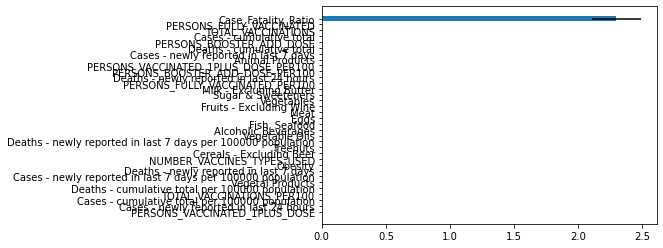

In [153]:
perm_importance_result_train = permutation_importance(
    lr_model, X_train, y_train, n_repeats=10)

plot_feature_importances(perm_importance_result_train, X_train.columns)

*Insert Feature Importances Summary & Results Write-Up Here*